## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [34]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [35]:
train, test = keras.datasets.cifar10.load_data()

In [36]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [37]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [38]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape,output_units=10,num_neurons=[512, 256, 128],lfun='l1',lratio=0.01):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_unit in enumerate(num_neurons):
        if i ==0:
            if lfun == 'l1':
                x = keras.layers.Dense(units=n_unit,
                                      activation="relu",
                                      name=f'hidden_layer{i+1}',
                                      kernel_regularizer=l1(lratio))(input_layer)
            elif lfun == 'l2':
                x = keras.layers.Dense(units=n_unit,
                                      activation="relu",
                                      name=f'hidden_layer{i+1}',
                                      kernel_regularizer=l2(lratio))(input_layer)
            elif lfun == 'l1_l2':
                x = keras.layers.Dense(units=n_unit,
                                      activation="relu",
                                      name=f'hidden_layer{i+1}',
                                      kernel_regularizer=l1_l2(lratio))(input_layer)
        else:
            if lfun == 'l1':
                x = keras.layers.Dense(units=n_unit,
                                      activation="relu",
                                      name=f'hidden_layer{i+1}',
                                      kernel_regularizer=l1(lratio))(x)
            elif lfun == 'l2':
                x = keras.layers.Dense(units=n_unit,
                                      activation="relu",
                                      name=f'hidden_layer{i+1}',
                                      kernel_regularizer=l2(lratio))(x)
            elif lfun == 'l1_l2':
                x = keras.layers.Dense(units=n_unit,
                                      activation="relu",
                                      name=f'hidden_layer{i+1}',
                                      kernel_regularizer=l1_l2(lratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [42]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
epochs = 10
batch_size = 256
momentum = 0.95
lratios = [1e-2, 1e-4, 1e-8]
lfuns = ['l1','l2','l1_l2']

In [45]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lfun in lfuns:
    for lratio in lratios:
        keras.backend.clear_session()
        print(f"Experiment with Regulizer = {lfun}_{lratio}")
        model = build_mlp(input_shape=x_train.shape[1:],lfun=lfun,lratio=lratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train,
                 epochs = epochs,
                 batch_size = batch_size,
                 validation_data = (x_test,y_test),
                 shuffle=True)
        
        # Collect results
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['accuracy']
        valid_acc = model.history.history['val_accuracy']
        
        results[f'exp-{lfun}_{lratio}'] = {'train-loss': train_loss,'valid-loss': valid_loss,
                                           'train-acc': train_acc,'valid-acc': valid_acc}

Experiment with Regulizer = l1_0.01
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [====

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 124us/step - loss: 15.0839 - accuracy: 0.2700 - val_loss: 13.9542 - val_accuracy: 0.3397
Epoch 2/10
50000/50000 [==============================] - 6s 121us/step - loss: 13.0157 - accuracy: 0.3544 - val_loss: 12.1211 - val_accuracy: 0.3744
Epoch 3/10
50000/50000 [==============================] - 6s 121us/step - loss: 11.3423 - accuracy: 0.3801 - val_loss: 10.5930 - val_accuracy: 0.3943
Epoch 4/10
50000/50000 [==============================] - 6s 121us/step - loss: 9.9299 - accuracy: 0.3940 - val_loss: 9.2990 - val_accuracy: 0.3983
Epoch 5/10
50000/50000 [==============================] - 6s 120us/step - loss: 8.7296 - accuracy: 0.4046 - val_loss: 8.1912 - val_accuracy: 0.4122
Epoch 6/10
50000/50000 [==============================] - 6s 119us/step - loss: 7.7062 - accuracy: 0.4148 - val_loss: 7.2443 - val_accuracy: 0.4141
Epoch 7/10
50000/50000 [==============================] 

50000/50000 [==============================] - 7s 137us/step - loss: 3.2019 - accuracy: 0.1000 - val_loss: 2.4712 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 7s 135us/step - loss: 2.4632 - accuracy: 0.0970 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 7s 135us/step - loss: 2.4624 - accuracy: 0.0986 - val_loss: 2.4622 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 7s 134us/step - loss: 2.4624 - accuracy: 0.0958 - val_loss: 2.4622 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [==============================] - 7s 134us/step - loss: 2.4623 - accuracy: 0.0979 - val_loss: 2.4620 - val_accuracy: 0.1000
Epoch 8/10
50000/50000 [==============================] - 7s 134us/step - loss: 2.4623 - accuracy: 0.0983 - val_loss: 2.4621 - val_accuracy: 0.1000
Epoch 9/10
50000/50000 [==============================] - 7s 135us/step - loss: 2.4623 - accuracy: 0.0979 - val_loss: 2.462

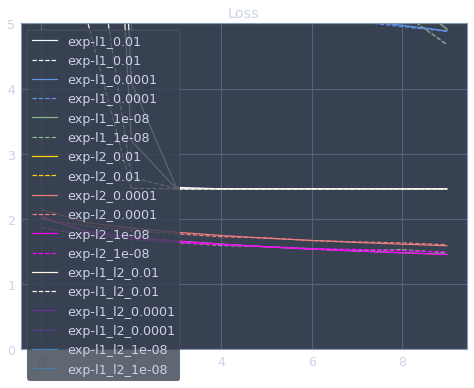

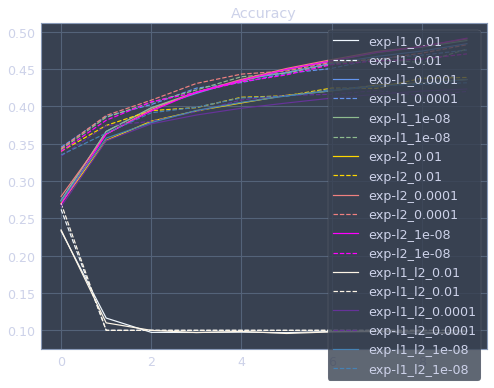

In [53]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
%matplotlib inline
color_bar = [color for i,color in  enumerate(mcd.CSS4_COLORS.values()) if i % 17 ==0]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [54]:
!jupyter nbconvert --to html Day_081_HW.ipynb Day_081_Regulization.ipynb

[NbConvertApp] Converting notebook Day_081_HW.ipynb to html
[NbConvertApp] Writing 548516 bytes to Day_081_HW.html
[NbConvertApp] Converting notebook Day_081_Regulization.ipynb to html
[NbConvertApp] Writing 473623 bytes to Day_081_Regulization.html
